In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

Count the number of de novo mutations per proband. The Phase_combined column records the inferred
parent of origin of the de novo mutation. Break the counts of de novo mutations down into maternally
inherited, paternally inherited, and total de novo mutations (including of unknown parental origin). 
Store these counts in a new pandas dataframe with columns: Proband_id, pat_dnm, mat_dnm, tot_dnm.

In [2]:
df = pd.read_csv("aau1043_dnm.tsv")
#df2 = pd.read_csv("aau1043_parental_age.tsv")
#print(df)
#count = df[("Proband_id")].value_counts()

roi_fthr = df["Phase_combined"] == "father"
df_fthr = df.loc[roi_fthr, :]

roi_mthr = df["Phase_combined"] == "mother"
df_mthr = df.loc[roi_mthr, :]


mat = (df['Proband_id'][df['Phase_combined']=='mother'].value_counts())
pat = (df['Proband_id'][df['Phase_combined']=='father'].value_counts())

t_df = pd.DataFrame(df['Proband_id'].value_counts().rename_axis('Proband_id').reset_index(name='tot_dnm'))
m_df = pd.DataFrame(df['Proband_id'][df['Phase_combined']=='mother'].value_counts().rename_axis('Proband_id').reset_index(name='mat_dnm'))
p_df = pd.DataFrame(df['Proband_id'][df['Phase_combined']=='father'].value_counts().rename_axis('Proband_id').reset_index(name='pat_dnm'))
        
new_df = pd.DataFrame.merge(t_df, m_df, on ='Proband_id')


#m_df = pd.DataFrame(mat, columns = ['Proband_ID','pat_dnm','mat_dnm'])
#p_df = pd.DataFrame(pat, columns = ['Proband_ID','pat_dnm','mat_dnm'])
#pd.merge(m_df,p_df)
print(new_df)




     Proband_id  tot_dnm  mat_dnm
0         91410      122       10
1        114094      121       22
2        111288      115       21
3          8147      114       27
4         88246      113       25
..          ...      ...      ...
391      121087       37        1
392       62630       34        5
393       76504       34        5
394       37789       34        3
395       13990       33        7

[396 rows x 3 columns]


Plotting Mutation Number vs Age

KeyError: 'Mother_age'

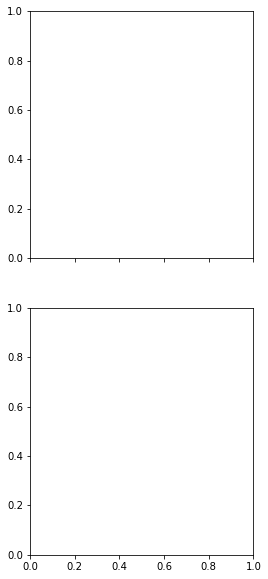

In [3]:
fig, ax = plt.subplots(nrows = 2, figsize = (4,10), sharex=True, sharey=True)
ax[0].scatter(x = new_df['Mother_age'], y =new_df['mat_dnm'])
ax[1].scatter(x = new_df['Father_age'], y =new_df['pat_dnm'])
ax[0].set_title('Maternal mutation number vs age')
ax[1].set_title('Paternal mutation number vs age')
ax[0].set_xlabel('Maternal age')
ax[0].set_ylabel('Mutation number')
ax[1].set_xlabel('Paternal age')
ax[1].set_ylabel('Mutation number')
ax[0].set_xlim(10,60)
ax[0].set_xlim(0,125)


mat_1 = pd.DataFrame(df['Proband_id'].value_counts())
    -->data frame with proband column and their counts
mat_1['tot_dnm'] =pd.DataFrame(df['Proband_id'].value_counts()) 
    -->data frame with total proband counts from mthr,fthr,and unknown
mat_1['mat_dnm'] = pd.DataFrame(df['Proband_id'][df['Phase_combined']=='mother'].value_counts())
    -->data frame with total proband counts from mthr
mat_1['pat_dnm'] = pd.DataFrame(df['Proband_id'][df['Phase_combined']=='father'].value_counts())
    -->data frame with total proband counts from fthr
merge on index

Linear Regression

In [ ]:
model = smf.ols(formula = "mat_dnm - 1 + mother_age", data = new_df)
results = model.fit()
results.summary()

In [ ]:
model = smf.ols(formula = "pat_dnm - 1 + father_age", data = new_df)
results = model.fit()
results.summary()

KeyError: 'pat_dnm'

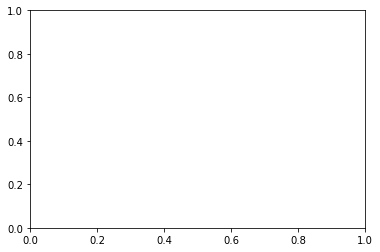

In [5]:
fig, ax = plt.subplots()
ax.hist(new_df["pat_dnm"], bins = 30, alpha = 0.6, label = 'paternal')
ax.hist(new_df["mat_dnm"], bins = 30, alpha = 0.6, label = 'maternal')
ax.set_xlabel('Number of de novo mutations')
ax.set_ylabel('count')
plt.legend()
plt.show

In [6]:
stats.ttest_ind(new_df["pat_dnm"],
               new_df["mat_dnm"])

NameError: name 'plotting_df' is not defined

Fitting Poisson Model

In [ ]:
model = smf.poisson(formula = "mat_dnm - 1 + mother_age", data = new_df)
mat_results = model.fit()
mat_results.summary()

In [ ]:
model = smf.poisson(formula = "pat_dnm - 1 + father_age", data = new_df)
pat_results = model.fit()
pat_results.summary()

In [ ]:
model = smf.poisson(formula = "mat_dnm - 1 + pat_dnm", data = new_df)
mat_vs_pat_results = model.fit()
mat_vs_pat_results.summary()